In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import plot_importance
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import os
import statistics
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Code_File\Data_Mining\HousePrice\housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4.526,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3.585,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3.521,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3.413,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3.422,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,2.068558
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,1.153956
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.149990
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,1.196000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,1.797000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,2.647250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199E8F30160>,
      dtype=object)

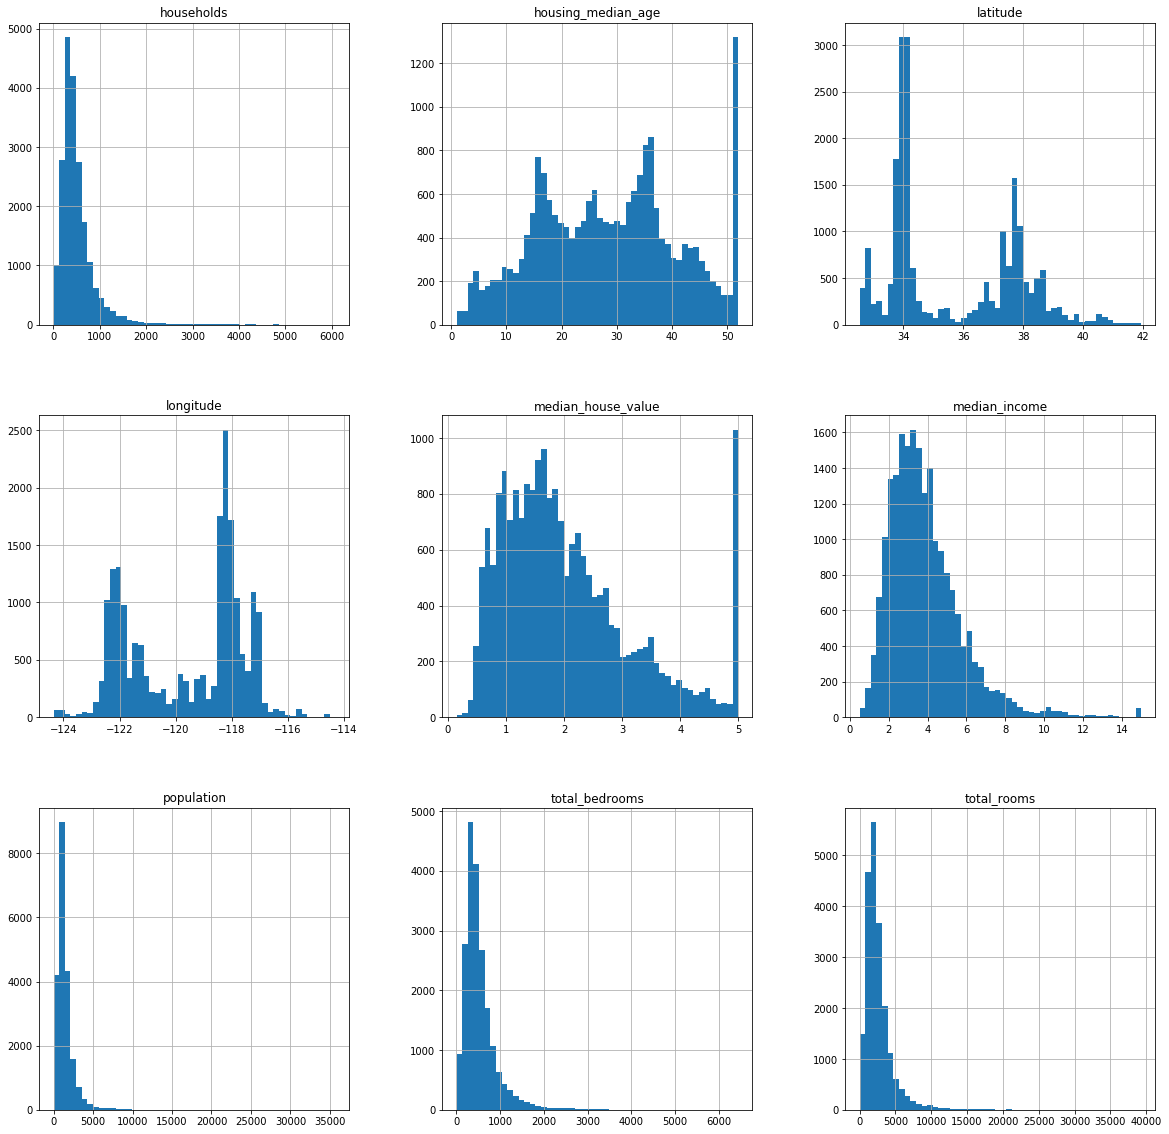

In [7]:
df.hist(bins = 50, figsize = (20,20))

In [8]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])

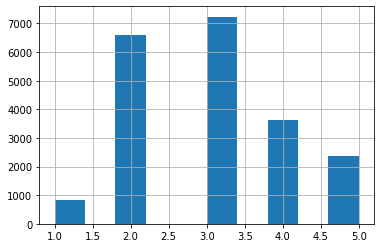

In [9]:
df['income_cat'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits = 1, train_size = 0.8, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,4.526,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3.585,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3.521,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3.413,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3.422,NEAR BAY,3
5,-122.25,37.85,52,919,213.0,413,193,4.0368,2.697,NEAR BAY,3
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,2.992,NEAR BAY,3
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,2.414,NEAR BAY,3
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,2.267,NEAR BAY,2
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,2.611,NEAR BAY,3


In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [14]:

for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

In [15]:
strat_train_set.shape

(16512, 10)

In [16]:
strat_test_set.shape

(4128, 10)

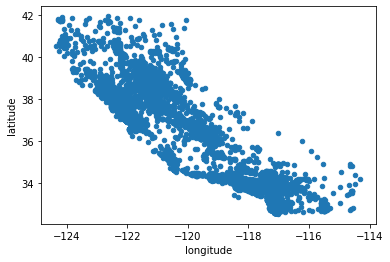

In [17]:
#visualizing the geography 
housing = strat_train_set
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

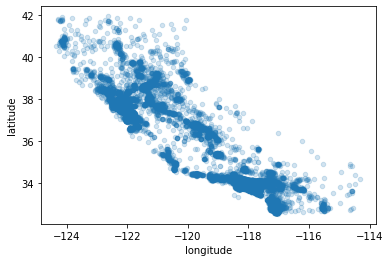

In [18]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2)

In [19]:
'''The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; 
for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house 
value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. Figure 2-14 shows various plots along with the correlation coeffi‐cient between their horizontal and vertical axes.'''

'''The correlation coefficient only measures linear correlations. if x goes up, then y generally goes up/down.
It may completely miss out on nonlinear relationships'''


'The correlation coefficient only measures linear correlations. if x goes up, then y generally goes up/down.\nIt may completely miss out on nonlinear relationships'

In [20]:
cm = housing.corr()
cm['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

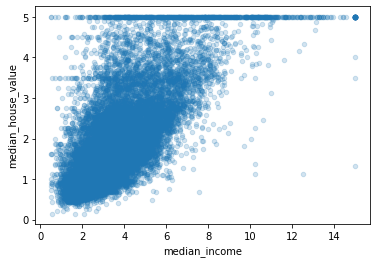

In [21]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2)

In [22]:
housing['rooms_per_threshold'] = housing['total_rooms']/housing['households']
housing['population_per_threshold'] = housing['population']/housing['households']
housing['bedrooms_per_total_rooms'] = housing['total_bedrooms']/housing['total_rooms']

In [23]:
cm = housing.corr()
cm['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_threshold         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_threshold   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_total_rooms   -0.259984
Name: median_house_value, dtype: float64

In [24]:
housing = strat_train_set.drop('median_house_value', axis = 1)
batman = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null int64
total_rooms                 16512 non-null int64
total_bedrooms              16354 non-null float64
population                  16512 non-null int64
households                  16512 non-null int64
median_income               16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_threshold         16512 non-null float64
population_per_threshold    16512 non-null float64
bedrooms_per_total_rooms    16354 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.6+ MB


In [26]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)
housing['bedrooms_per_total_rooms'].fillna(median, inplace = True)

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null int64
total_rooms                 16512 non-null int64
total_bedrooms              16512 non-null float64
population                  16512 non-null int64
households                  16512 non-null int64
median_income               16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_threshold         16512 non-null float64
population_per_threshold    16512 non-null float64
bedrooms_per_total_rooms    16512 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.6+ MB


In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(strategy = 'median')

In [30]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_threshold,population_per_threshold,bedrooms_per_total_rooms
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,4.625369,2.094395,0.223852
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,6.008850,2.707965,0.159057
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,4.225108,2.025974,0.241291
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,5.232295,4.135977,0.200866
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,4.505810,3.047847,0.231341
19480,-120.97,37.66,24,2930,588.0,1448,570,3.5395,INLAND,5.140351,2.540351,0.200683
8879,-118.50,34.04,52,2233,317.0,769,277,8.3839,<1H OCEAN,8.061372,2.776173,0.141961
13685,-117.24,34.15,26,2041,293.0,936,375,6.0000,INLAND,5.442667,2.496000,0.143557
4937,-118.26,33.99,47,1865,465.0,1916,438,1.8242,<1H OCEAN,4.257991,4.374429,0.249330
4861,-118.28,34.02,29,515,229.0,2690,217,0.4999,<1H OCEAN,2.373272,12.396313,0.444660


In [31]:
#housing.dropna(subset=["total_bedrooms"]) 
hnm = housing.drop('ocean_proximity', axis = 1)

In [32]:
hnm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_threshold,population_per_threshold,bedrooms_per_total_rooms
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,4.625369,2.094395,0.223852
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,6.008850,2.707965,0.159057
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,4.225108,2.025974,0.241291
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,5.232295,4.135977,0.200866
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,4.505810,3.047847,0.231341
19480,-120.97,37.66,24,2930,588.0,1448,570,3.5395,5.140351,2.540351,0.200683
8879,-118.50,34.04,52,2233,317.0,769,277,8.3839,8.061372,2.776173,0.141961
13685,-117.24,34.15,26,2041,293.0,936,375,6.0000,5.442667,2.496000,0.143557
4937,-118.26,33.99,47,1865,465.0,1916,438,1.8242,4.257991,4.374429,0.249330
4861,-118.28,34.02,29,515,229.0,2690,217,0.4999,2.373272,12.396313,0.444660


In [33]:
imputer.fit(hnm)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.81765270e+00,  2.03589356e-01])

In [35]:
#to make sure if the system went online it would do the sam if we have any missign values there
X = imputer.transform(hnm)
X
housing_tr = pd.DataFrame(X,columns = hnm.columns)

In [36]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16512 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
rooms_per_threshold         16512 non-null float64
population_per_threshold    16512 non-null float64
bedrooms_per_total_rooms    16512 non-null float64
dtypes: float64(11)
memory usage: 1.4 MB


In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
housingpr = housing[['ocean_proximity']]
Oe = OrdinalEncoder()
hencoded = Oe.fit_transform(housingpr)

In [39]:
hencoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [40]:
Oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
Ohe = OneHotEncoder()

In [43]:
hcd = Ohe.fit_transform(hencoded).toarray()
hcd.shape

D:\APP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(16512, 5)

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

In [45]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
            return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [46]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [47]:
addeddf = pd.DataFrame(housing_extra_attribs)
addeddf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341,4.50581,3.04785
5,-120.97,37.66,24,2930,588,1448,570,3.5395,INLAND,5.14035,2.54035,0.200683,5.14035,2.54035
6,-118.5,34.04,52,2233,317,769,277,8.3839,<1H OCEAN,8.06137,2.77617,0.141961,8.06137,2.77617
7,-117.24,34.15,26,2041,293,936,375,6,INLAND,5.44267,2.496,0.143557,5.44267,2.496
8,-118.26,33.99,47,1865,465,1916,438,1.8242,<1H OCEAN,4.25799,4.37443,0.24933,4.25799,4.37443
9,-118.28,34.02,29,515,229,2690,217,0.4999,<1H OCEAN,2.37327,12.3963,0.44466,2.37327,12.3963


In [48]:
''' IN pipeline All but the last estimator must be transformers (i.e., they must have a fit_transform() method)'''
#Feature Scaling
#for normalization use MinMaxScaling and for other well you know
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pl = Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('attb_adder',  CombinedAttributesAdder()), 
               ('scaling', StandardScaler())])

In [49]:
housing_num_transformd = pl.fit_transform(hnm)

In [50]:
dff = pd.DataFrame(housing_num_transformd)

In [51]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
0     16512 non-null float64
1     16512 non-null float64
2     16512 non-null float64
3     16512 non-null float64
4     16512 non-null float64
5     16512 non-null float64
6     16512 non-null float64
7     16512 non-null float64
8     16512 non-null float64
9     16512 non-null float64
10    16512 non-null float64
11    16512 non-null float64
12    16512 non-null float64
13    16512 non-null float64
dtypes: float64(14)
memory usage: 1.8 MB


In [52]:
list(hnm)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_threshold',
 'population_per_threshold',
 'bedrooms_per_total_rooms']

In [53]:
num_atb = list(hnm)
cat_atb = ['ocean_proximity']

In [54]:
['ocean_proximity']

['ocean_proximity']

In [55]:
num_atb

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_threshold',
 'population_per_threshold',
 'bedrooms_per_total_rooms']

In [56]:
''' The constructor requires a list of tuples, where each tuple contains a name22, a transformer and a list of names (or indices) of columns
that the transformer should be applied to.'''
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([('num', pl, num_atb), ('cat'), OneHotEncoder(), ['ocean_proximity']])

In [57]:
'''Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. When there is such a mix of sparse 
and dense matrices, the Colum nTransformer estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns 
a sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense 
matrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to 
each column.'''

'Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns a dense matrix. When there is such a mix of sparse \nand dense matrices, the Colum nTransformer estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns \na sparse matrix if the density is lower than a given threshold (by default, sparse_threshold=0.3). In this example, it returns a dense \nmatrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies the appropriate transformations to \neach column.'

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = list(hnm)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", pl, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [59]:
housing_prepared.shape

(16512, 19)

# LinearRegression

In [60]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores).mean()
lin_rmse_scores
# display_scores(lin_rmse_scores)

0.6904497072524516

In [61]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [2.10768952 3.17642593 2.11206658 0.59231109 1.89655714]
Labels: [2.866, 3.406, 1.969, 0.46299999999999997, 2.545]


In [63]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6861416510105578

# DecisionTreeRegressor

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=20),
        'max_features': randint(low=1, high=15),  
        'max_leaf_nodes': randint(low=10, high=1000),
      'min_impurity_split': randint(low=0, high=200),
     'min_samples_leaf': randint(low=1, high=200),
     'min_samples_split': randint(low=1, high=200),
#      'min_weight_fraction_leaf': randint(low=0, high=0.5),            
    }

Dtr = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(Dtr, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
print(rnd_search.best_params_)  
# print(rnd_search.best_params_, np.sqrt(-(rnd_search.best_score_)))

D:\APP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators wi

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is d

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is d

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is d

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23

D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is d

{'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': 870, 'min_impurity_split': 14, 'min_samples_leaf': 107, 'min_samples_split': 72}


D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
D:\APP\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is d

In [65]:
from sklearn.model_selection import cross_val_score
Dtr = DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=9,
           max_leaf_nodes=570, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,min_samples_split=5, min_weight_fraction_leaf=0.0,
           random_state=42, splitter='best')
score = cross_val_score(Dtr, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
# score
Dtr_rmse_scores = np.sqrt(-score).mean()
Dtr_rmse_scores

0.6322589367649969

In [66]:
Dtr.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=9,
                      max_leaf_nodes=570, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [67]:
DTR_prediction = Dtr.predict(housing_prepared)
Dtr_mse = mean_squared_error(housing_labels, DTR_prediction)
Dtr_rmse = np.sqrt(Dtr_mse)
Dtr_rmse

0.4794320966899844

# RandomForest

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_features': randint(low=1, high=15),
        'max_depth': randint(low=1, high=20),
        'min_samples_split': randint(low=10, high=200),    
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
print(rnd_search.best_params_)  
# print(rnd_search.best_params_, np.sqrt(-(rnd_search.best_score_)))

{'max_depth': 12, 'max_features': 10, 'min_samples_split': 31, 'n_estimators': 253}


In [69]:
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=250,max_depth= 12, max_features=10, min_samples_split=31, min_impurity_split=None, 
                                   min_samples_leaf=1,random_state=42)
score = cross_val_score(forest_reg,housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [70]:
Fr_rmse_scores = np.sqrt(-score).mean()
Fr_rmse_scores

0.521261154827446

In [71]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=31,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [72]:
forest_reg_prediction = forest_reg.predict(housing_prepared)
Fr_mse = mean_squared_error(housing_labels, forest_reg_prediction)
Fr_rmse = np.sqrt(Fr_mse)
Fr_rmse

0.42315977496361346

In [73]:
# display_scores(Fr_rmse_scores)

# Gradient Boosting

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_depth': randint(low=1, high=20),
        'max_features': randint(low=1, high=15),     
        'min_samples_split': randint(low=10, high=200),
        'learning_rate': [0.01,0.05,0.1,0.15,0.3,0.5],
    }

GBR = GradientBoostingRegressor(random_state=42)
rnd_search = RandomizedSearchCV(GBR, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)
print(rnd_search.best_params_)  
# print(rnd_search.best_params_, np.sqrt(-(rnd_search.best_score_)))

{'learning_rate': 0.05, 'max_depth': 16, 'max_features': 14, 'min_samples_split': 199, 'n_estimators': 175}


In [75]:
from sklearn.model_selection import cross_val_score
GBR = GradientBoostingRegressor(n_estimators=200,max_depth= 8,max_features=8, min_samples_split=100,
                                learning_rate=0.1,subsample=0.8,random_state=42)

score = cross_val_score(GBR,housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [76]:
GBR_rmse_scores = np.sqrt(-score).mean()
GBR_rmse_scores

0.46544170764862763

In [77]:
GBR.fit(housing_prepared, housing_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=8, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=100,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [78]:
GBR_prediction = GBR.predict(housing_prepared)
GBR_mse = mean_squared_error(housing_labels, GBR_prediction)
GBR_rmse = np.sqrt(GBR_mse)
GBR_rmse

0.29561704398071376

# XGBoost

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'colsample_bytree': randint(low=0.00001, high=1),
        'gamma': randint(low=0.001, high=1),
        'max_depth': randint(low=1, high=15),     
        'min_child_weight': randint(low=5, high=20),
        'n_estimators': randint(low=1, high=300),
       'reg_alpha': randint(low=0.001, high=2),
       'reg_lambda': randint(low=0.001, high=2),
       'subsample': randint(low=0.001, high=2),
        'learning_rate': [0.01,0.05,0.1,0.15,0.3,0.5],
    }

XGB_tuned = xgb.XGBRegressor(random_state=42)
rnd_search = RandomizedSearchCV(XGB_tuned, param_distributions=param_distribs,
                                n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

print(rnd_search.best_params_)  
# print(rnd_search.best_params_, np.sqrt(-(rnd_search.best_score_)))

{'colsample_bytree': 0, 'gamma': 0, 'learning_rate': 0.5, 'max_depth': 2, 'min_child_weight': 16, 'n_estimators': 277, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}


In [80]:
from sklearn.model_selection import cross_val_score
XGB_tuned = xgb.XGBRegressor(colsample_bytree=0,gamma=0,                 
                 learning_rate=0.5,max_depth=2,min_child_weight=16,
                 n_estimators=277,reg_alpha=0,reg_lambda=1,
                 subsample=1, random_state=42)
score = cross_val_score(XGB_tuned,housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [81]:
XGB_tuned_rmse_scores = np.sqrt(-score).mean()
XGB_tuned_rmse_scores

0.5938095134975929

In [82]:
XGB_tuned.fit(housing_prepared, housing_labels)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=2,
             min_child_weight=16, missing=nan, monotone_constraints='()',
             n_estimators=277, n_jobs=12, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [83]:
XGB_tuned_prediction = XGB_tuned.predict(housing_prepared)
XGB_tuned_mse = mean_squared_error(housing_labels, XGB_tuned_prediction)
XGB_tuned_rmse = np.sqrt(XGB_tuned_mse)
XGB_tuned_rmse

0.5523773733681128

# KNN

In [84]:
from sklearn.model_selection import cross_val_score
k = 6
knn = KNeighborsRegressor(k)
score = cross_val_score(knn,housing_prepared,housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [85]:
knn_rmse_scores = np.sqrt(-score).mean()
knn_rmse_scores

0.6191608336317802

In [86]:
knn.fit(housing_prepared, housing_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [87]:
knn_prediction = knn.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, knn_prediction)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.5186804820879437